--- Datos de entrenamiento ---
-40.0 grados Celsius = -40.0 grados Fahrenheit
-10.0 grados Celsius = 14.0 grados Fahrenheit
0.0 grados Celsius = 32.0 grados Fahrenheit
8.0 grados Celsius = 46.0 grados Fahrenheit
15.0 grados Celsius = 59.0 grados Fahrenheit
22.0 grados Celsius = 72.0 grados Fahrenheit
38.0 grados Celsius = 100.0 grados Fahrenheit

--- Resultados del Modelo ---
Entrenamiento del modelo finalizado.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicción para 100°C: 211.32 °F
Fórmula aprendida (W, B): W=1.82, B=28.99
Pesos de la capa: [array([[1.8232355]], dtype=float32), array([28.994806], dtype=float32)]


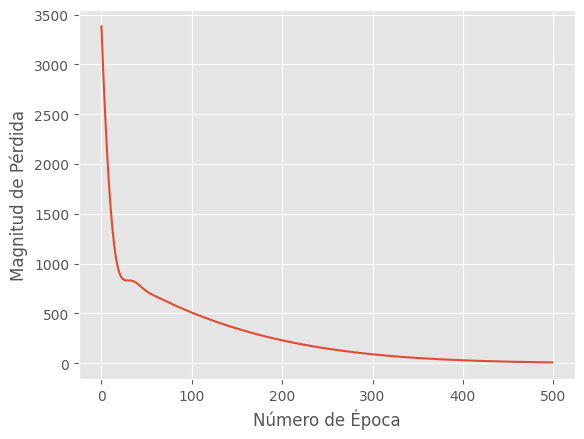

In [21]:
import tensorflow as tf
import numpy as np
import logging
import matplotlib.pyplot as plt

# Configuración para suprimir logs de error de TensorFlow
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Datos de entrenamiento
celsius_q = np.array([-40, -10, 0, 8, 15, 22, 38], dtype = float)
fahrenheit_a = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

# Inspección de datos
print("--- Datos de entrenamiento ---")
for i,c in enumerate(celsius_q):
  print("{} grados Celsius = {} grados Fahrenheit".format(c, fahrenheit_a[i]))

# 1. Definición del modelo (Una sola capa densa)
l0 = tf.keras.layers.Dense(units = 1, input_shape=[1])
model = tf.keras.Sequential([l0])

# 2. Compilación del modelo
model.compile(loss="mean_squared_error", optimizer = tf.keras.optimizers.Adam(0.1))

# 3. Entrenamiento
history = model.fit(celsius_q, fahrenheit_a, epochs = 500, verbose=False)

print("\n--- Resultados del Modelo ---")
print("Entrenamiento del modelo finalizado.")

# 4. Predicción y pesos finales
# ====================================================================
# CORRECCIÓN CLAVE: La entrada debe ser un array 2D (lote de una muestra).
input_data = np.array([100.0], dtype=float).reshape(-1, 1)
prediction = model.predict(input_data)
# ====================================================================

print(f"Predicción para 100°C: {prediction[0][0]:.2f} °F")

# La fórmula es F = W * C + B
W, B = l0.get_weights()
print(f"Fórmula aprendida (W, B): W={W[0][0]:.2f}, B={B[0]:.2f}")
print(f"Pesos de la capa: {l0.get_weights()}")

# 5. Visualización de la pérdida
plt.xlabel('Número de Época')
plt.ylabel("Magnitud de Pérdida")
plt.plot(history.history['loss'])
plt.show()
